* Problem statement.

* Build a recommender system by using cosine similarties score.


* Loaded the dataset for the book 
* there are 10,000 observations and 4 features
* sorted the entire dataframe on the basis of userid column ascending
* Did initial analysis on the data
* there are 9659 unique books & total observations were 10,000
* 10,000 - 9659 = 341, this means that only 341 books are read by more than 2 users
* very less matches for userid will be obtained.
* Implemented collaborative filtering system for books using cosine simillarties score
* ie. based on the users interest match books will be recommended
* based on the similar_user_table conclusions were drawn, mentioned at the end of file


In [449]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import pairwise_distances

In [450]:
book_data = pd.read_csv('book_re.csv')
print(book_data.shape)
book_data.head(10)

(10000, 4)


,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [451]:
book_data = book_data.drop(columns=['Unnamed: 0'], axis=1)

In [452]:
book_data.head(10)

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
6,276745,What If?: The World's Foremost Military Histor...,10
7,276747,PLEADING GUILTY,9
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8


In [454]:
# sorting the entire dataframe by column userid
book_data = book_data.sort_values(by=['User.ID']).reset_index(drop=True)
book_data.head(10)

,User.ID,Book.Title,Book.Rating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7
5,8,Keepers of the Earth Teachers Guide,6
6,8,The Celts Activity Book,6
7,9,The Book of Kells: Selected Plates in Full Color,6
8,10,SINGLE &amp; SINGLE,6
9,12,Apocalypse Wow,10


## Initial Analysis

In [456]:
print(book_data['User.ID'].nunique())
book_data['User.ID'].value_counts()

2182


3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
160954      1
1180        1
1172        1
1164        1
278500      1
Name: User.ID, Length: 2182, dtype: int64

In [457]:
print(book_data.shape)
print(book_data.isnull().sum())
book_data.info()

(10000, 3)
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [458]:
book_data.describe(include = 'all')

,User.ID,Book.Title,Book.Rating
count,10000.000000,10000,10000.00000
unique,NaN,9659,NaN
top,NaN,Fahrenheit 451,NaN
freq,NaN,5,NaN
mean,95321.249800,NaN,7.56630
std,117645.703609,NaN,1.82152
min,8.000000,NaN,1.00000
25%,2103.000000,NaN,7.00000
50%,3757.000000,NaN,8.00000
75%,162052.000000,NaN,9.00000


In [462]:
book_data.groupby(by='Book.Title')['Book.Rating'].max()

Book.Title
 Jason, Madison &amp                                                       8
 Other Stories;Merril;1985;McClelland &amp                                 6
 Repairing PC Drives &amp                                                  4
'48                                                                        7
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      8
                                                                          ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    8
\Well, there's your problem\: Cartoons                                     9
iI Paradiso Degli Orchi                                                    7
stardust                                                                   5
�?�?bermorgen.                                                             4
Name: Book.Rating, Length: 9659, dtype: int64

In [463]:
# list of top 10 active users
active_users = book_data.groupby('User.ID')['Book.Title'].count().sort_values(ascending=False).head(10).to_dict()
#print(active_users.shape)
print(active_users.keys())

dict_keys([3757, 162052, 2276, 4017, 277427, 2033, 278418, 2110, 3363, 1733])


In [467]:
#displays table of top 10 users who have read maximum books
keys = active_users.keys()
values = active_users.values()
active_users_table = pd.DataFrame(columns=['No of Books Read','userid'])
active_users_table['userid'] = keys
active_users_table['No of Books Read'] = values
print("Top 10 users who have read maximum no. of books")
active_users_table

Top 10 users who have read maximum no. of books


,No of Books Read,userid
0,523,3757
1,214,162052
2,212,2276
3,156,4017
4,150,277427
5,132,2033
6,117,278418
7,103,2110
8,94,3363
9,91,1733


In [468]:
# userid 3757 has read 523 books
book_data[book_data['User.ID']==3757]

,User.ID,Book.Title,Book.Rating
4599,3757,Who Invited Aliens to My Slumber Party (Scared...,7
4600,3757,Three Daughters,8
4601,3757,Better Than Running at Night,7
4602,3757,The Velveteen Rabbit: Or How Toys Become Real ...,7
4603,3757,A Southern Belle Primer: Or Why Princess Marga...,7
...,...,...,...
5117,3757,Second Daughter: Growing Up in China 1930-1949,8
5118,3757,Mrs Keppel and Her Daughter,8
5119,3757,"The Final Days: The Last, Desperate Abuses of ...",7
5120,3757,All Through The Night : A Suspense Story,6


In [470]:
# there are 9659 unique books
print(book_data['Book.Title'].nunique())
book_data['Book.Title'].value_counts()

9659


Fahrenheit 451                                                                                    5
The Amber Spyglass (His Dark Materials, Book 3)                                                   4
The Subtle Knife (His Dark Materials, Book 2)                                                     4
Charlie and the Chocolate Factory                                                                 4
Stardust                                                                                          4
                                                                                                 ..
The Gryphon: In Which the Extraordinary Correspondence of Griffin &amp; Sabine Is Rediscovered    1
Murder on the Orient Express                                                                      1
My Sergei: A Love Story                                                                           1
Nicholas Nickleby (Everyman's Library)                                                            1


<AxesSubplot:xlabel='Book.Rating', ylabel='count'>

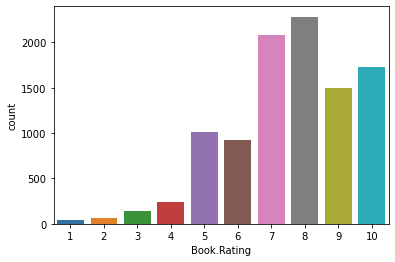

In [471]:
# from below graph
# rating is from scale 1 to 10
# around 1000 books received rating of 5
# maximum books received rating of 8
# minimum books received rating of 1
# around 1700 books received rating of 10
sns.countplot(x= 'Book.Rating', data= book_data)

In [472]:
#top 10 books which has received maximum rating of 10
top_10 = book_data.sort_values(by =['Book.Rating'], ascending=False).head(10)
top_10

,User.ID,Book.Title,Book.Rating
2963,2288,Weirdos From Another Planet!,10
8920,277938,Elfstones of Shannara,10
6683,161533,The Pearl,10
3880,3167,Women in Love,10
7909,276964,Angels and Visitations: A Miscellany,10
3881,3167,Survival Kit for Overseas Living: For American...,10
1543,1399,Mecanoscrit del segon origen (El Trapezi ; 24),10
1540,1396,Lucky : A Memoir,10
1539,1395,Dreaming in Cuban,10
3888,3172,Discover Your Genius: How to Think Like Histor...,10


## Model Building - Cosine similarities

In [473]:
user_user_recom = pd.pivot_table(book_data,
                                 index='User.ID',
                                 columns='Book.Title',
                                 values='Book.Rating').reset_index(drop=True)
user_user_recom

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
print(user_user_recom.shape)
user_user_recom.dtypes

(2182, 9659)


Book.Title
 Jason, Madison &amp                                                       float64
 Other Stories;Merril;1985;McClelland &amp                                 float64
 Repairing PC Drives &amp                                                  float64
'48                                                                        float64
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      float64
                                                                            ...   
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    float64
\Well, there's your problem\: Cartoons                                     float64
iI Paradiso Degli Orchi                                                    float64
stardust                                                                   float64
�?�?bermorgen.                                                             float64
Length: 9659, dtype: object

In [475]:
# user_user_recom id is starting from 0 
# we want to display the user_id there instead of index
user_user_recom.index = book_data['User.ID'].unique()
print(user_user_recom.shape)
user_user_recom.head(10)

(2182, 9659)


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [476]:
# will fill NaN values with 0
user_user_recom.fillna(value = 0, axis=0,inplace=True)
user_user_recom.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [477]:
user_user_recom.dtypes

Book.Title
 Jason, Madison &amp                                                       float64
 Other Stories;Merril;1985;McClelland &amp                                 float64
 Repairing PC Drives &amp                                                  float64
'48                                                                        float64
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      float64
                                                                            ...   
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    float64
\Well, there's your problem\: Cartoons                                     float64
iI Paradiso Degli Orchi                                                    float64
stardust                                                                   float64
�?�?bermorgen.                                                             float64
Length: 9659, dtype: object

In [478]:
 user_user_recom.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 7., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [479]:
# We want the values in the form of percentage so 
# we will use a different metric in the pairwise_distances
# so repeating the above steps again

user_user_similarity = 1 - pairwise_distances(X = user_user_recom.values, metric='cosine')
#print(type(user_user_similarity))
print(user_user_similarity)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [480]:
user_user_recom_final = pd.DataFrame(user_user_similarity)
print(user_user_recom_final.shape)
user_user_recom_final.head()

(2182, 2182)


,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [481]:
# renaming the index as userid
print(book_data['User.ID'].unique())
user_user_recom_final.index = book_data['User.ID'].unique()
user_user_recom_final.head(10)

[     8      9     10 ... 278851 278852 278854]


,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [482]:
# renaming the columns as userid
print(book_data['User.ID'].unique())
user_user_recom_final.columns = book_data['User.ID'].unique()
user_user_recom_final.head(10)

[     8      9     10 ... 278851 278852 278854]


,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [483]:
# filling diagonal values as 0 coz 
# intersection of userid say 3 is 100 % similar does not make sense
# they are same user will be similar
np.fill_diagonal(a = user_user_similarity, val = 0)

In [484]:
user_user_recom_final

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [485]:
# displays maximum value in each row
# for userid 8, 9,10,12,14 max value is 0
# ie. whatever books are read by these users are not read by other users so value is 0
# for userid 278851 maximum value is 2%
max_val_rowwise = user_user_recom_final.max(axis=0)
max_val_rowwise

8         0.000000
9         0.000000
10        0.000000
12        0.000000
14        0.000000
            ...   
278846    0.000000
278849    0.000000
278851    0.023464
278852    0.000000
278854    0.000000
Length: 2182, dtype: float64

In [486]:
#to find out similar users
# intersection of the row(userid) with column(userid) having maximum value 
# Returns index and column values
similar_user_table = user_user_recom_final.idxmax(axis=0)
similar_user_table

# from the o/p below
#for userid 8,9,10,12,14 the recommended userid is 8 for all
# this happens coz there is no match found between them & hence the value is 0 in the user_user_recom table
# since all these userids have 0 value hence similar_user_table is matching them on basis of 0
# so we cannot recommend books read by the userid 8 to userids 8,9,10,12,14 & so on

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [487]:
similar_user_table[0:50]

8           8
9           8
10          8
12          8
14          8
16          8
17          8
19     278418
22          8
26          8
32          8
39          8
42          8
44          8
51       3757
53       1996
56          8
64          8
67          8
69          8
70          8
73          8
75          8
78          8
81          8
82        882
83     276861
85       1211
86     276780
87          8
88          8
91          8
92          8
97          8
99          8
102         8
107         8
109         8
110         8
114         8
125         8
129         8
133         8
137         8
141         8
160       899
162         8
165         8
169         8
176         8
dtype: int64

In [488]:
book_data.head(15)

,User.ID,Book.Title,Book.Rating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7
5,8,Keepers of the Earth Teachers Guide,6
6,8,The Celts Activity Book,6
7,9,The Book of Kells: Selected Plates in Full Color,6
8,10,SINGLE &amp; SINGLE,6
9,12,Apocalypse Wow,10


In [489]:
# 7 books are read by the userid = 8
book_data[book_data['User.ID']==8].value_counts()

User.ID  Book.Title                                                           Book.Rating
8        Ancient Celtic Romances                                              5              1
         Keepers of the Earth Teachers Guide                                  6              1
         The Art Of Celtia                                                    7              1
         The Celts Activity Book                                              6              1
         The Western way: A practical guide to the Western mystery tradition  5              1
         Truckers                                                             5              1
         Wings                                                                5              1
dtype: int64

In [490]:
#checking if books read by userid = 8 has been read by anybody else also in dataset(ds)
print(book_data[book_data['Book.Title'] == 'Ancient Celtic Romances'])
print(book_data[book_data['Book.Title'] == 'Keepers of the Earth Teachers Guide'])
print(book_data[book_data['Book.Title'] == 'The Art Of Celtia'])
print(book_data[book_data['Book.Title'] == 'The Celts Activity Book'])
print(book_data[book_data['Book.Title'] == 'The Western way: A practical guide to the Western mystery tradition'])
print(book_data[book_data['Book.Title'] == 'Truckers'])
print(book_data[book_data['Book.Title'] == 'Wings'])

   User.ID               Book.Title  Book.Rating
2        8  Ancient Celtic Romances            5
   User.ID                           Book.Title  Book.Rating
5        8  Keepers of the Earth Teachers Guide            6
   User.ID         Book.Title  Book.Rating
4        8  The Art Of Celtia            7
   User.ID               Book.Title  Book.Rating
6        8  The Celts Activity Book            6
   User.ID                                         Book.Title  Book.Rating
1        8  The Western way: A practical guide to the West...            5
   User.ID Book.Title  Book.Rating
3        8   Truckers            5
   User.ID Book.Title  Book.Rating
0        8      Wings            5


* since the books read by userid 8 has not been read by any user in the ds
* this means that whatever userid (8,9,10,12,14) are matched with userid 8 are matched on the basis of 0 values 
* ie. there is no match between these ids.

* matched userid from the table below
*     19     278418
*     51       3757
*     53       1996

* we will check for similarity between these users

### Checking for a match between userid : 19, 278418

In [493]:
book_data[book_data['User.ID']==278418].value_counts()

User.ID  Book.Title                                        Book.Rating
278418   253                                               5              1
         Sangre a Borbotones (Coleccion Nueva Biblioteca)  6              1
         The Cat Who Knew Shakespeare                      6              1
         The Cat Who Could Read Backwards                  4              1
         The Anatomist                                     8              1
                                                                         ..
         Dragonsong                                        7              1
         Dragonsinger (Harper Hall Trilogy)                7              1
         Dragondrums                                       4              1
         Dr. Atkins' Age-Defying Diet Revolution           6              1
         Wild Thorn                                        3              1
Length: 117, dtype: int64

In [494]:
book_data[book_data['User.ID']==19].value_counts()

User.ID  Book.Title       Book.Rating
19       The Murder Book  7              1
dtype: int64

In [495]:
book_data[book_data['Book.Title'] == 'The Murder Book']

,User.ID,Book.Title,Book.Rating
18,19,The Murder Book,7
9511,278418,The Murder Book,6


### Conclusion

* Both users have read 'The Murder Book'
* Therefore, we can say that the both user's interest matches
* So, we can recommend the books read by the useid(278418) to userid(19) 

### Checking for a match between userid : 53, 1996

In [496]:
book_data[book_data['User.ID']==53].value_counts()

User.ID  Book.Title      Book.Rating
53       Prey            9              1
         Reliquary       10             1
         Sick Puppy      3              1
         Turning Thirty  6              1
dtype: int64

In [497]:
book_data[book_data['User.ID']==1996].value_counts()       

User.ID  Book.Title             Book.Rating
1996     CSI, Miami: Heat Wave  7              1
         Sick Puppy             8              1
         Tempting the Heiress   7              1
dtype: int64

###  Conclusion

* Both users have read 'Sick Puppy'
* Therefore, we can say that the both user's interest matches
* So, we can recommend the other books read by the useid(53) to userid(1996) & vice versa